In [63]:
from sklearn.metrics import confusion_matrix ,precision_score ,accuracy_score ,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import dash_html_components as html
import dash_core_components as dcc
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import dash

In [64]:
df = pd.read_csv(r'C:\Users\computer\Desktop\Software & Data science projects\Data science\Data science & analytics project\Project 1\dataset\Hospitals.csv')
print(df.shape)
df.info()

(8013, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           8013 non-null   float64
 1   Y           8013 non-null   float64
 2   OBJECTID    8013 non-null   int64  
 3   ID          8013 non-null   int64  
 4   NAME        8013 non-null   object 
 5   ADDRESS     8013 non-null   object 
 6   CITY        8013 non-null   object 
 7   STATE       8013 non-null   object 
 8   ZIP         8013 non-null   int64  
 9   ZIP4        8013 non-null   object 
 10  TELEPHONE   8013 non-null   object 
 11  TYPE        8013 non-null   object 
 12  STATUS      8013 non-null   object 
 13  POPULATION  8013 non-null   int64  
 14  COUNTY      8013 non-null   object 
 15  COUNTYFIPS  8013 non-null   int64  
 16  COUNTRY     8013 non-null   object 
 17  LATITUDE    8013 non-null   float64
 18  LONGITUDE   8013 non-null   float64
 19  NAICS_CODE  8013

In [65]:
df.dropna()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-86.494549,31.295795,1,1336420,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL,36420,NOT AVAILABLE,...,2014/02/10 00:00:00+00,http://www.andalusiaregionalhospital.com,H2001,NOT AVAILABLE,1,PROPRIETARY,-999,88,LEVEL III,Y
1,-86.978407,34.804164,2,1535611,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,NOT AVAILABLE,...,2013/10/02 00:00:00+00,http://www.athenslimestonehospital.com,H4201,NOT AVAILABLE,1,PROPRIETARY,-999,71,LEVEL III,N
2,-87.478799,31.017024,3,136502,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL,36502,NOT AVAILABLE,...,2014/02/10 00:00:00+00,http://www.ebaptisthealthcare.org/atmorecommun...,H2704,NOT AVAILABLE,1,NON-PROFIT,-999,51,LEVEL III,Y
3,-86.174930,32.376399,4,236124,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL,36117,1267,...,2013/09/03 00:00:00+00,http://www.baptistfirst.org,H5107,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,150,NOT AVAILABLE,Y
4,-86.277549,32.328154,5,1736111,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL,36111,0010,...,2014/03/12 00:00:00+00,http://www.baptistfirst.org,H5102,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,432,LEVEL II,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,-74.347278,40.500067,8117,196784290,UNIVERSITY HOSPITAL,97 SUNFIELD AVENUE,EDISON,NJ,8837,NOT AVAILABLE,...,2022/04/07 00:00:00+00,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,34,NOT AVAILABLE,-999,-999,NOT AVAILABLE,NOT AVAILABLE
8009,-104.754827,38.968781,8118,196784298,CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...,4090 BRIARGATE PARKWAY,COLORADO SPRINGS,CO,80920,NOT AVAILABLE,...,2022/04/07 00:00:00+00,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,8,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y
8010,-91.219417,30.266626,8119,196784302,OCHSNER MEDICAL COMPLEX IBERVILLE,25455 LA-1,PLAQUEMINE,LA,70764,NOT AVAILABLE,...,2022/04/07 00:00:00+00,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,22,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y
8011,-83.811348,39.939755,8120,196784919,MERCY HEALTH FOUNTIAN MEDICAL CAMPUS,100 W MCCREIGHT AVE,SPRINGFIELD,OH,45504,NOT AVAILABLE,...,2022/05/02 00:00:00+00,https://www.mercy.com/,NOT AVAILABLE,NOT AVAILABLE,39,PROPRIETARY,-999,-999,NOT AVAILABLE,N


<h2>Data Analitycs</h2>

In [66]:
Val_method = df["VAL_METHOD"].unique()
Naics_description = df["NAICS_DESC"].unique()
Country = df["COUNTRY"].unique()
Status = df["STATUS"].unique()
Type = df['TYPE'].unique()
State = df['STATE'].unique()
City = df['CITY'].unique()
Hospital_name = df['NAME'].unique()
total_staff = df['TTL_STAFF'].unique()
Trauma = df['TRAUMA'].unique()
ST_fips = df['ST_FIPS'].unique() 
Owner = df['OWNER'].unique() 
Alt_name  = df['ALT_NAME'].unique() 
County  = df['COUNTY'].unique() 
County_fips  = df['COUNTYFIPS'].unique() 
Naics_codes  = df['NAICS_CODE'].unique() 
Source = df['SOURCE'].unique()
Helipad = df['HELIPAD'].unique()



print(f"The unique val_method is : {Val_method}")
print(f"The unique Naics_description is : {Naics_description}")
print(f"The unique Country is : {Country}")
print(f"The unique status is : {Status}")
print(f"The unique type is : {Type}")
print(f"The unique state is : {State}")
print(f"The unique City is : {City}")
print(f"The unique Hospital name is : {Hospital_name}")
print(f"The unique total staff is : {total_staff}")
print(f"The unique trauma is : {Trauma}")
print(f"The unique ST_fips is : {ST_fips}")
print(f"The unique owner is : {Owner}")
print(f"The unique Alt_name is : {Alt_name}")
print(f"The unique County is : {County}")
print(f"The unique County_fips is : {County_fips}")
print(f"The unique Naics_codes is : {Naics_codes}")
print(f"The unique helipad is : {Helipad}")

The unique val_method is : ['IMAGERY/OTHER' 'IMAGERY' 'GEOCODE' 'UNVERIFIED']
The unique Naics_description is : ['GENERAL MEDICAL AND SURGICAL HOSPITALS'
 'PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS'
 "CHILDREN'S HOSPITALS, GENERAL"
 'REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, DRUG ADDICTION)'
 'SPECIALTY (EXCEPT PSYCHIATRIC AND SUBSTANCE ABUSE) HOSPITALS'
 'HOSPITALS, SPECIALTY (EXCEPT PSYCHIATRIC, SUBSTANCE ABUSE)'
 'EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTANCE ABUSE)'
 'HOSPITALS, SUBSTANCE ABUSE' 'CHRONIC DISEASE HOSPITALS'
 'HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)'
 "CHILDREN'S HOSPITALS, SPECIALTY (EXCEPT PSYCHIATRIC, SUBSTANCE ABUSE)"
 'ORTHOPEDIC HOSPITALS' 'HOSPITALS, PSYCHIATRIC PEDIATRIC'
 "CHILDREN'S HOSPITALS, PSYCHIATRIC OR SUBSTANCE ABUSE"
 'HOSPITALS, ADDICTION' 'MATERNITY HOSPITALS' 'MENTAL HEALTH HOSPITALS']
The unique Country is : ['USA' 'ASM' 'GUM' 'MNP' 'PLW' 'PRI' 'VIR']
The unique status is : ['OPEN' 'CLOSED']
The unique type is : ['GENERAL ACUTE CARE'

In [67]:
#Questions asked :-How much beds are in each hospital ?
#                 -Which level of trauma care each hospital provide ?
#                 -How much hospital each county & city & country have ?
#                 -The differents types of hospitals belong to each hospital ?
#                 -what are validation methods used for hospitals ?
#                 -How much hospitals each owner have ?
#                 -How much Helipad each owner have ?
#                 -Finally i have to plot chart that should countain :The number of hospital in each location

In [68]:
#Q1 :-How much beds are in each hospital ?

app = dash.Dash(__name__)

fig = px.scatter_mapbox(
    df,
    lat="Y",  
    lon="X",  
    hover_name="NAME",  
    hover_data=["BEDS" ,"TRAUMA" ,"HELIPAD" ,'COUNTY' ,'CITY'],  
    title="Hospital Locations with number of beds for each one",
    mapbox_style="open-street-map",  
    zoom=1,  
)


app.layout = html.Div([
    dcc.Graph(figure=fig),
])


if __name__ == "__main__":
    app.run_server(debug=True)



In [69]:
#-How much hospital have each country  ?
HP_Country = df['COUNTRY'].value_counts().to_frame().reset_index()
HP_City = df['CITY'].value_counts()
HP_Country = df['COUNTY'].value_counts()
country_hospital_count = df.groupby('COUNTRY')['NAME'].nunique().reset_index()
country_hospital_count.rename(columns={'NAME' :'Number of hospital'} ,inplace=True)

Text(0.5, 1.0, 'The number of hospital in each country')

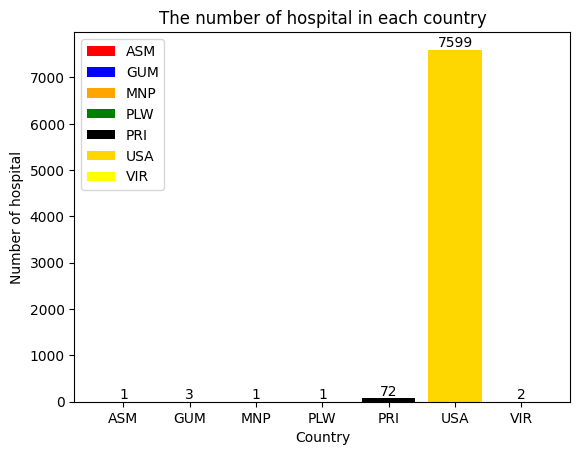

In [70]:
fig ,ax = plt.subplots()

country = country_hospital_count['COUNTRY'].to_list()
Number_of_hospital = country_hospital_count['Number of hospital'].to_list()

colors = ['red' ,'blue' ,'orange' ,'green' ,'black' ,'gold' ,'yellow']

bars = ax.bar(country ,Number_of_hospital ,color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')
    
ax.set_xlabel('Country')
ax.set_ylabel('Number of hospital')
legend_labels = ['ASM', 'GUM', 'MNP', 'PLW', 'PRI', 'USA', 'VIR']
ax.legend(bars, legend_labels)
ax.set_title('The number of hospital in each country')

In [71]:
country_hospital_count = df.groupby('COUNTRY')['NAME'].nunique().reset_index()
country_hospital_count
# Create the choropleth map
fig = px.choropleth(
    country_hospital_count,
    locations='COUNTRY',
    color='NAME',
    color_continuous_scale="Viridis",
    title="Number of Hospitals per Country",
    hover_name='COUNTRY', 
    labels={'NAME': 'Number of Hospitals'}
)

fig.show()


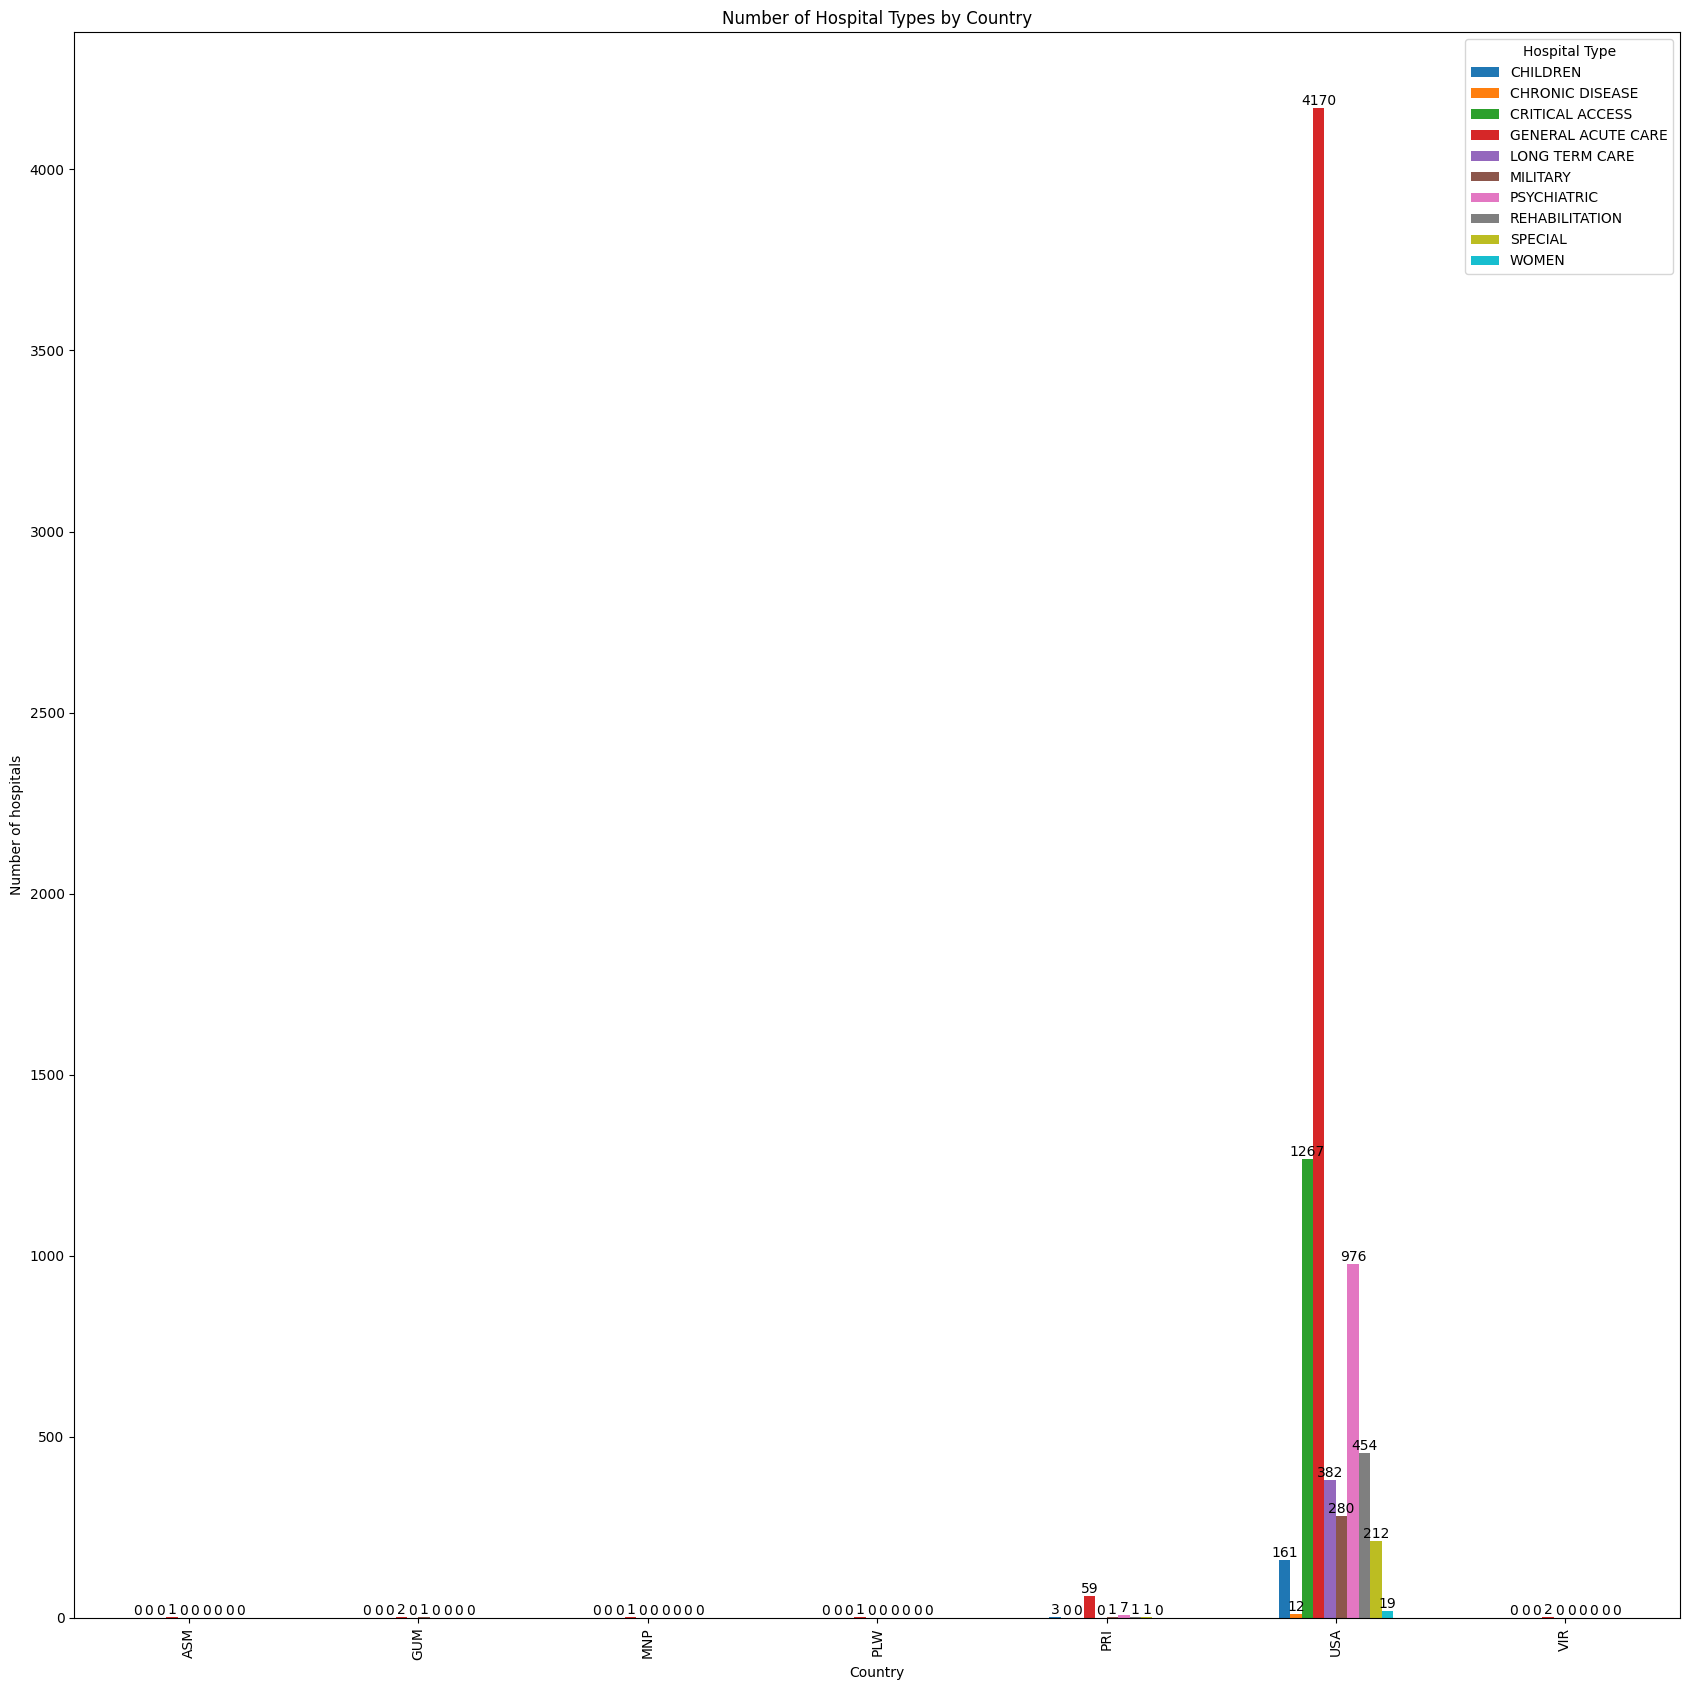

In [72]:
#- Number of types of hospital in each county of USA ?

df_pivot = df.groupby(['COUNTRY', 'TYPE']).size().reset_index(name='COUNT')
pivot_table = df_pivot.pivot_table(index='TYPE', columns='COUNTRY', values='COUNT', fill_value=0).transpose()

ax = pivot_table.plot(kind='bar', figsize=(17, 17))
for container in ax.containers:
    for bar in container:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')
plt.title('Number of Hospital Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of hospitals')
plt.legend(title='Hospital Type')
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'The rate of openand closed hospital in US')

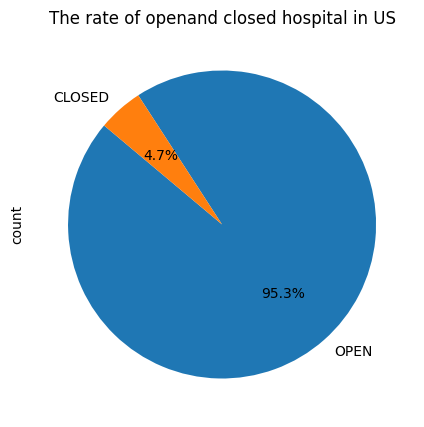

In [73]:
#- How many hospitals are open and how many are closed?
hospital_status = df['STATUS'].value_counts()
hospital_status.plot(kind='pie' ,autopct='%1.1f%%', startangle=140, figsize=(5 ,5))
plt.title('The rate of openand closed hospital in US')

In [74]:
#-How many hospitals provide trauma care? What is the distribution by state or city ?
Number_hospital_trauma = len(df['TRAUMA']) - len(df[df['TRAUMA'] == 'NOT AVAILABLE'])
print(f"Number of hospital with trauma care :{Number_hospital_trauma}")

Number of hospital with trauma care :2376


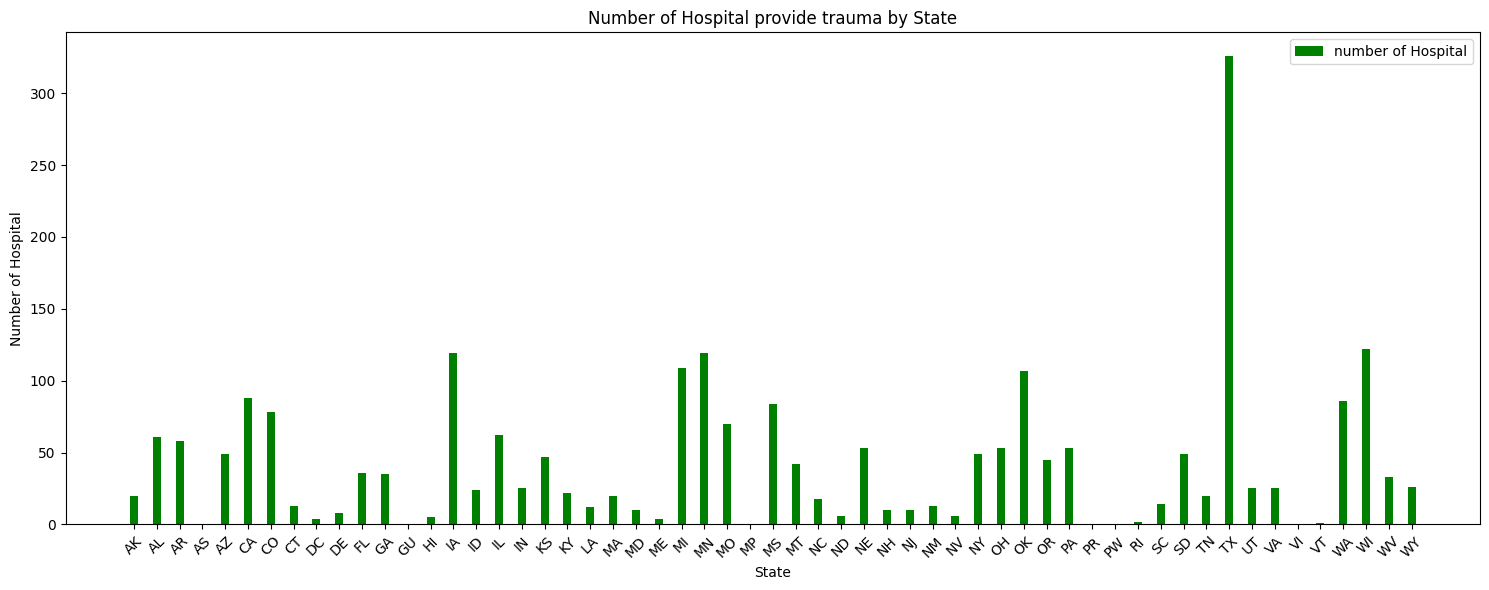

In [75]:
#-What is the distribution of hospital provide trauma by state ?
df_pivot_2 = df.groupby(['TRAUMA', 'STATE']).size().reset_index(name='COUNT')
pivot_table_2 = df_pivot_2.pivot_table(index='TRAUMA', columns='STATE', values='COUNT', fill_value=0)
pivot_table_2 = pivot_table_2[~pivot_table_2.index.isin(['NOT AVAILABLE'])]

list_state = pivot_table_2.columns.to_list()
Number_hospital = []
for state in list_state:
    num_hospital = sum(pivot_table_2[state])
    
    Number_hospital.append(num_hospital)
    
plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(list_state))

plt.bar(index, Number_hospital, width=bar_width, label='number of Hospital', color='green')

plt.xlabel('State')
plt.ylabel('Number of Hospital')
plt.title('Number of Hospital provide trauma by State')
plt.legend()
plt.xticks(index, list_state, rotation=45)
    
plt.tight_layout()
plt.show()

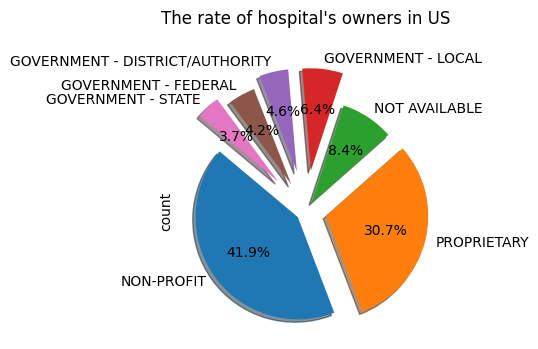

In [76]:
#-What are the predominant types of hospital owners (private, government, nonprofit)? How does ownership vary by state?
hospital_status = df['OWNER'].value_counts()
fig = plt.figure(figsize=(10, 15))
explodes = (0.1, 0.2, 0.1, 0.4 ,0.4 ,0.3 ,0.4)
hospital_status.plot(kind='pie' ,explode=explodes ,autopct='%1.1f%%' ,shadow=True ,startangle=140, figsize=(5 ,5))
plt.title("The rate of hospital's owners in US" ,y=1.2)
plt.tight_layout()
plt.show()

<h2>EDA & data processing</h2>

<p>The first purpose of the following project is to predict wheather an hospital is opened or closed ?</p>
<p>To do that we should use classification ,so we will start by choising the appropriate features to train the model</p>
<p>features of type numeric :X ,y ,ZIP ,BEDS ,NAICS_CODE</p>
<P>features of type object :NAME ,ADDRESS ,CITY ,STATE ,TELEPHONE ,TYPE ,TRAUMA ,COUNTY ,COUNTYFIPS ,COUNTRY ,NAICS_DESC ,VAL_METHOD ,ST_FIPS ,OWNER ,HELIPAD</p>
<p>The first step is to understand the data caracteristics</p>

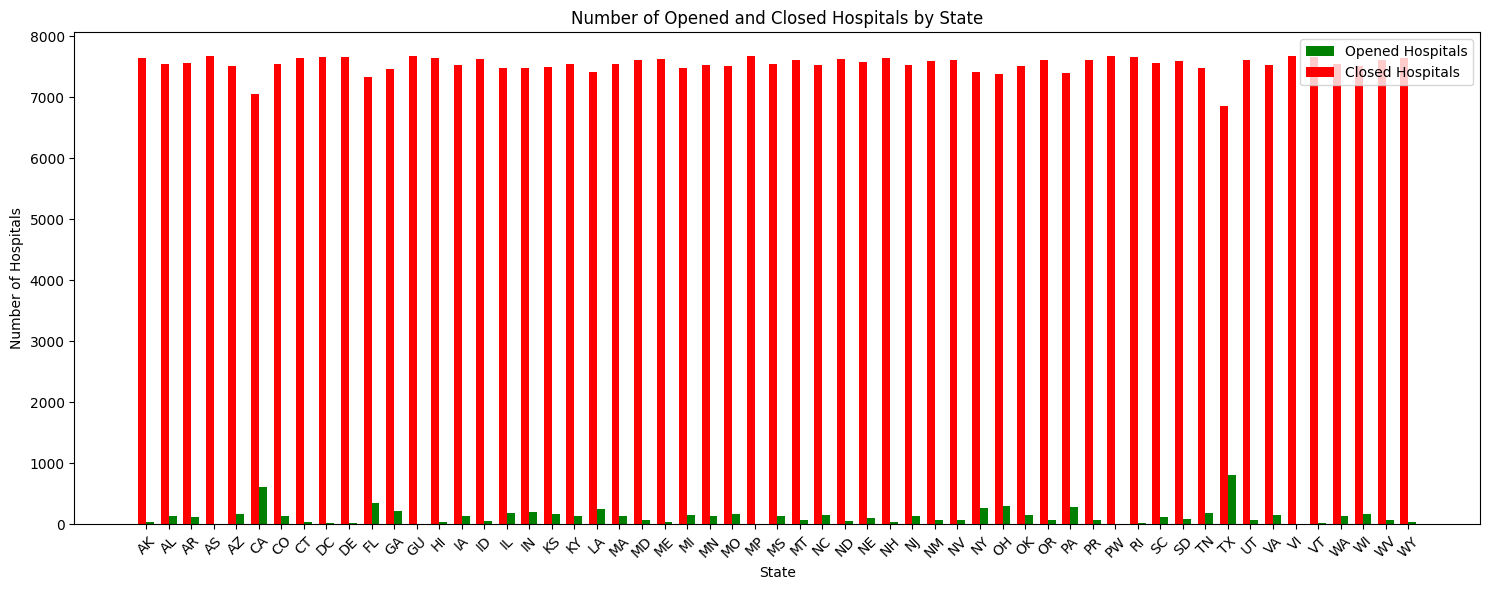

In [77]:
#- What is the distribution of opened and closed hospital by state ?
df_pivot_1 = df.groupby(['NAME', 'STATE']).size().reset_index(name='COUNT')
pivot_table_1 = df_pivot_1.pivot_table(index='STATE', columns='NAME', values='COUNT', fill_value=0).transpose()

list_state = pivot_table_1.columns.to_list()
closed_hospital = []
opened_hospital = []
for state in list_state:
    num_opened_hospitals = sum(pivot_table_1[state] == 1)
    num_closed_hospitals = sum(pivot_table_1[state] == 0)
    
    opened_hospital.append(num_opened_hospitals)
    closed_hospital.append(num_closed_hospitals)
    
plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(list_state))

plt.bar(index+bar_width/2, opened_hospital, width=bar_width, label='Opened Hospitals', color='green')
plt.bar(index-bar_width/2, closed_hospital, width=bar_width, label='Closed Hospitals', color='red')

plt.xlabel('State')
plt.ylabel('Number of Hospitals')
plt.title('Number of Opened and Closed Hospitals by State')
plt.xticks(index, list_state, rotation=45)
plt.legend()
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Spatial destribution of open and closed hospital')

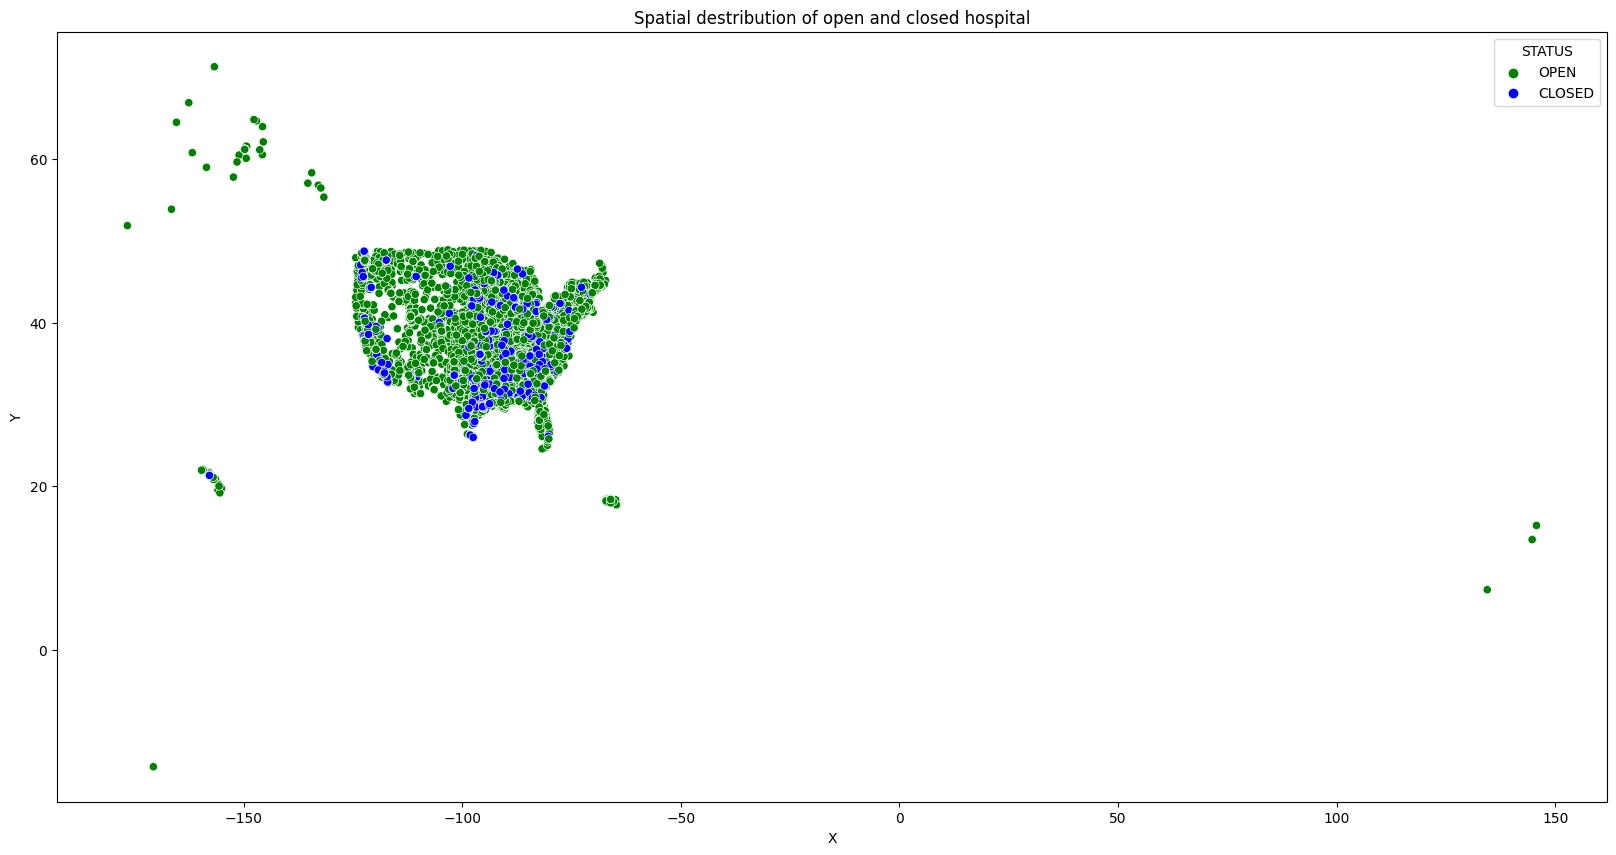

In [78]:
plt.figure(figsize=(20 ,10))
sns.scatterplot(data=df ,x='X' ,y='Y' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.title('Spatial destribution of open and closed hospital')

<p>-We can notice from tha graph that the open hospital are more clusttered ,while closed ones are more spreaded</p>
<p>-The number of closed hospital is much more inferiour than of opened ones</p>
<p> We can conclude that we have imbalanced number of hospitals in terms of opened and closed onces .also the spreading of closed hospital could
influence learning process of ML algorithm from X ,Y features </p>

the skewness coefficient is :-1.3500244131904606


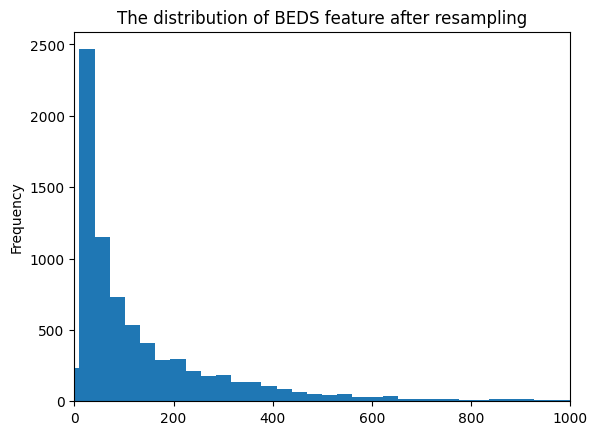

In [79]:
df['BEDS'].plot(kind='hist' ,bins=100)
plt.xlim(0 ,1000)
plt.title("The distribution of BEDS feature after resampling")

skewness = df['BEDS'].skew()

print(f"the skewness coefficient is :{skewness}")

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by each state")

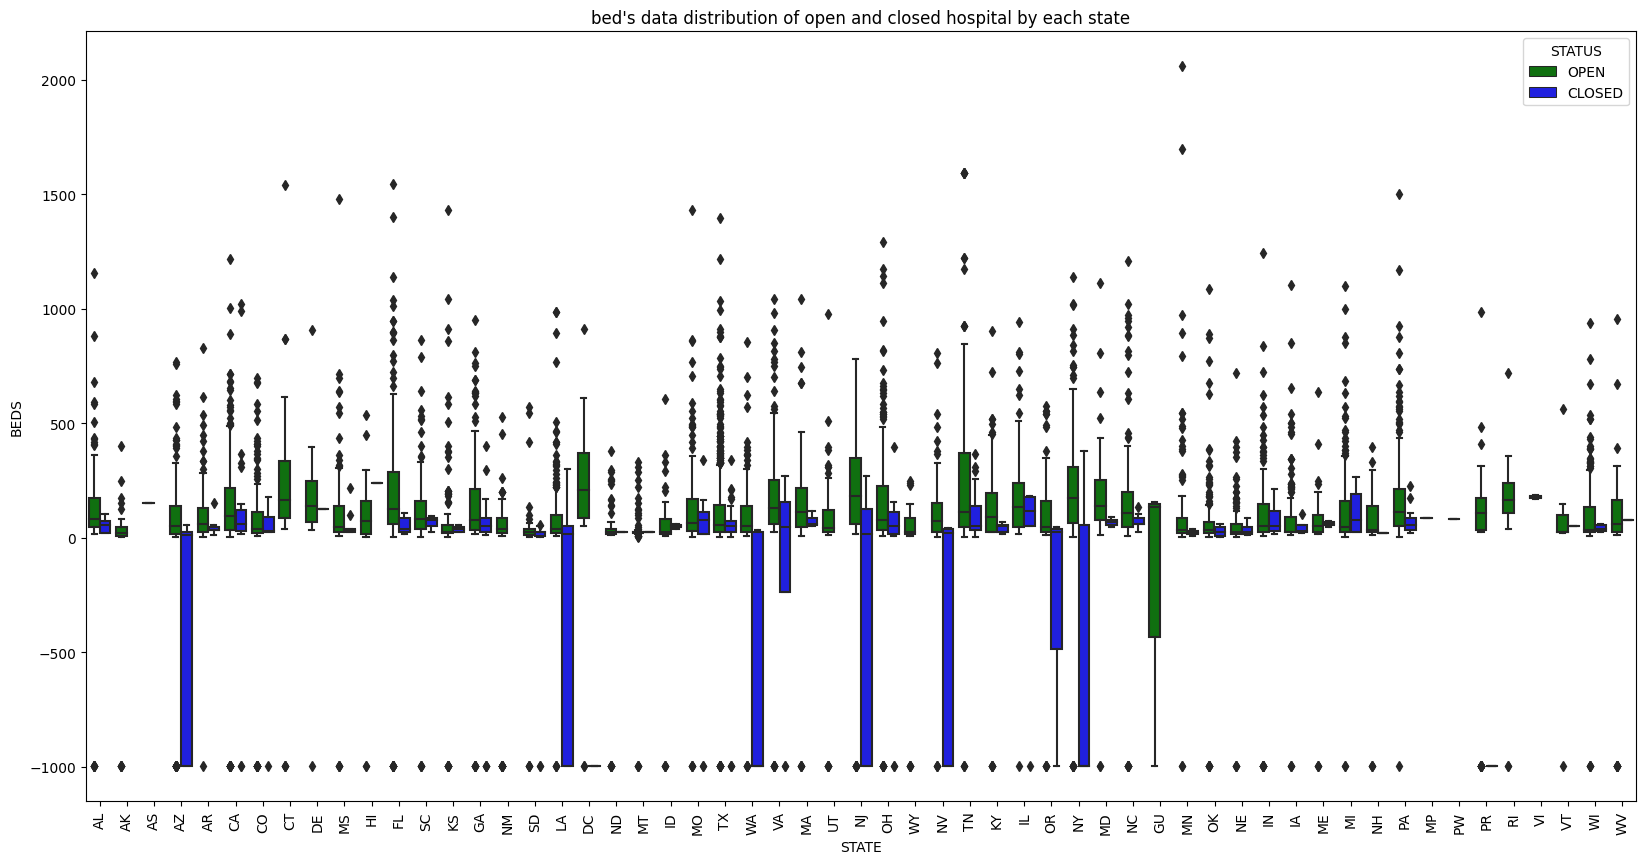

In [80]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='STATE' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=90)
plt.title("bed's data distribution of open and closed hospital by each state")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each state</b></p> is that the data which correspond to <b>open hospital</b> are distributed positively compared to <b>closed hospital</b> which are distributed negatively in some states</p>
<p>-Secondly the distribution of bed's data in both hospital cases are not equaly distributed in each state</p>
<p>-Thirsty we have many outliers</p>

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by trauma level")

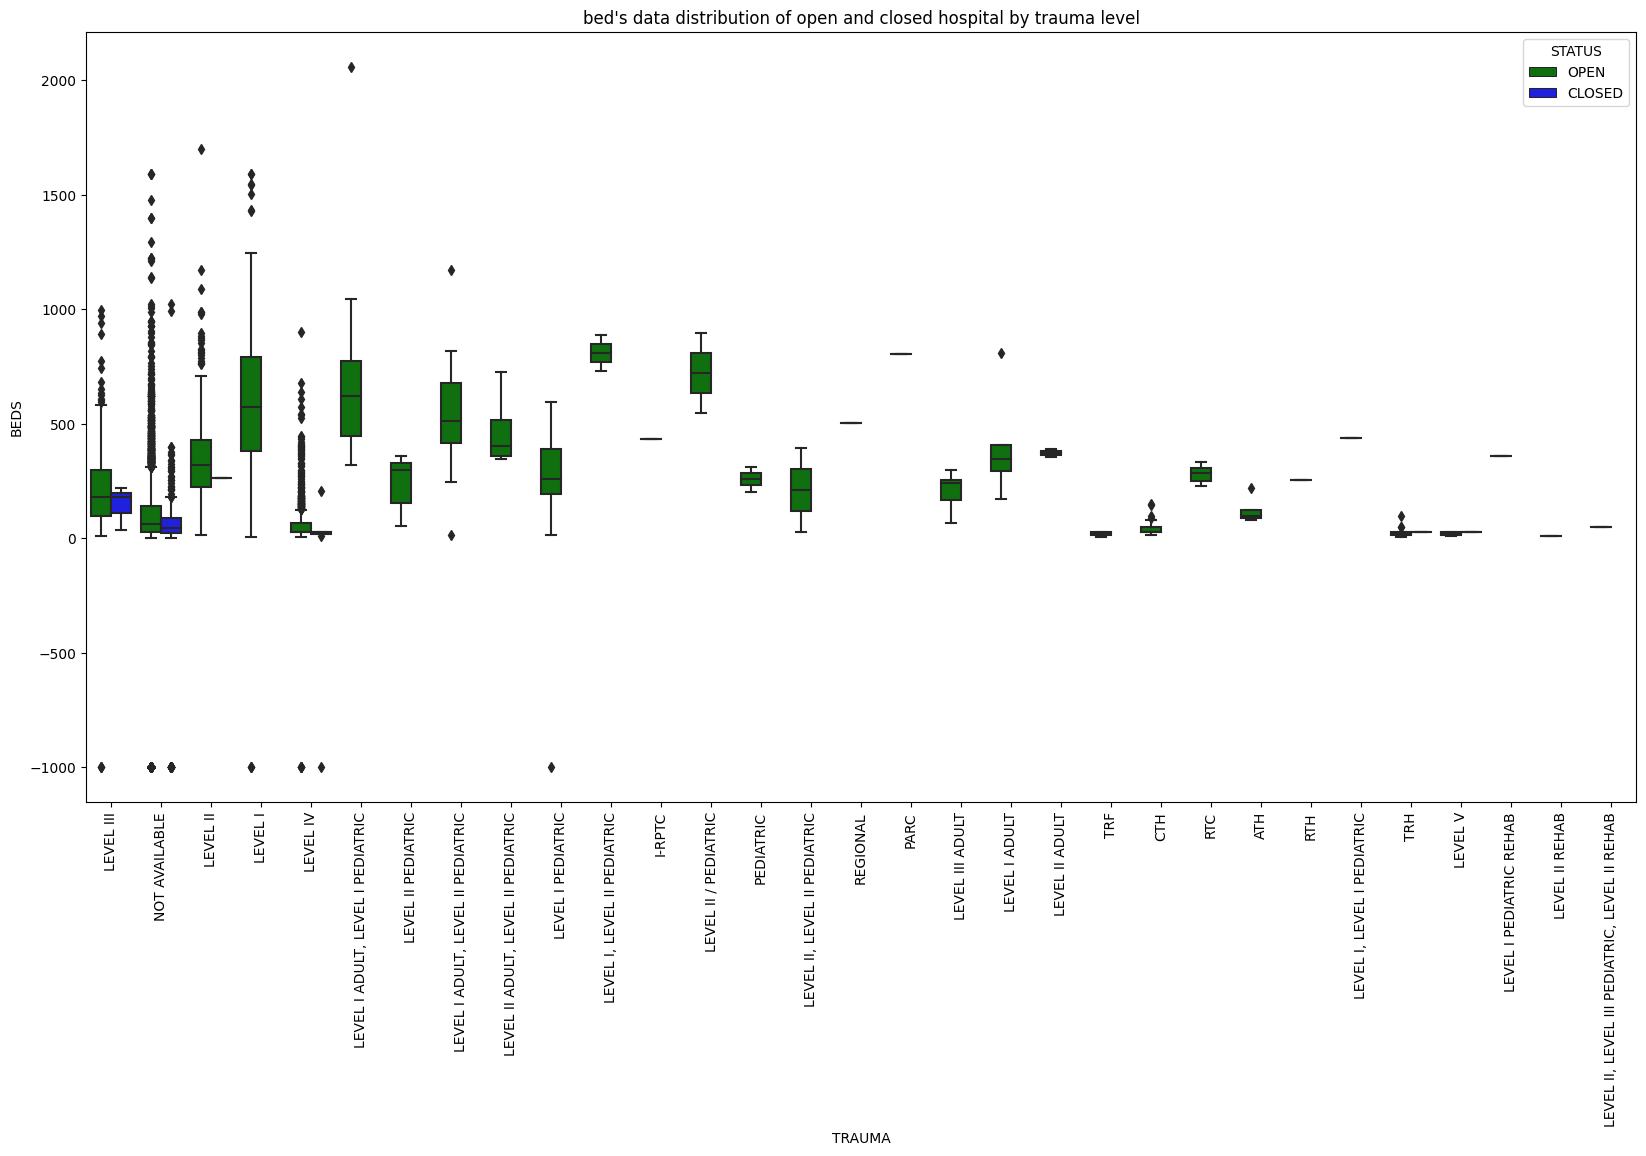

In [81]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='TRAUMA' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=90)
plt.title("bed's data distribution of open and closed hospital by trauma level")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each trauma</b></p> is that the data which correspond to <b>open hospital</b> and <b> closed hospital </b> are distributed positively over trauma feature</p>
<p>-Secondly the distribution of bed's data in both hospital cases seems to be bretty or equaly distributed in some trauma cases like in :LEVEL 2 ,LEVEL 1 ,LEVEL 1 ADULT ,LEVEL 1 PEDIATRIC etc ... ,compared to others</p>
<p>-Thirsty we have many outliers in the first 5 trauma types and level compared to the rest which have not outlier</p>

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by hospital type")

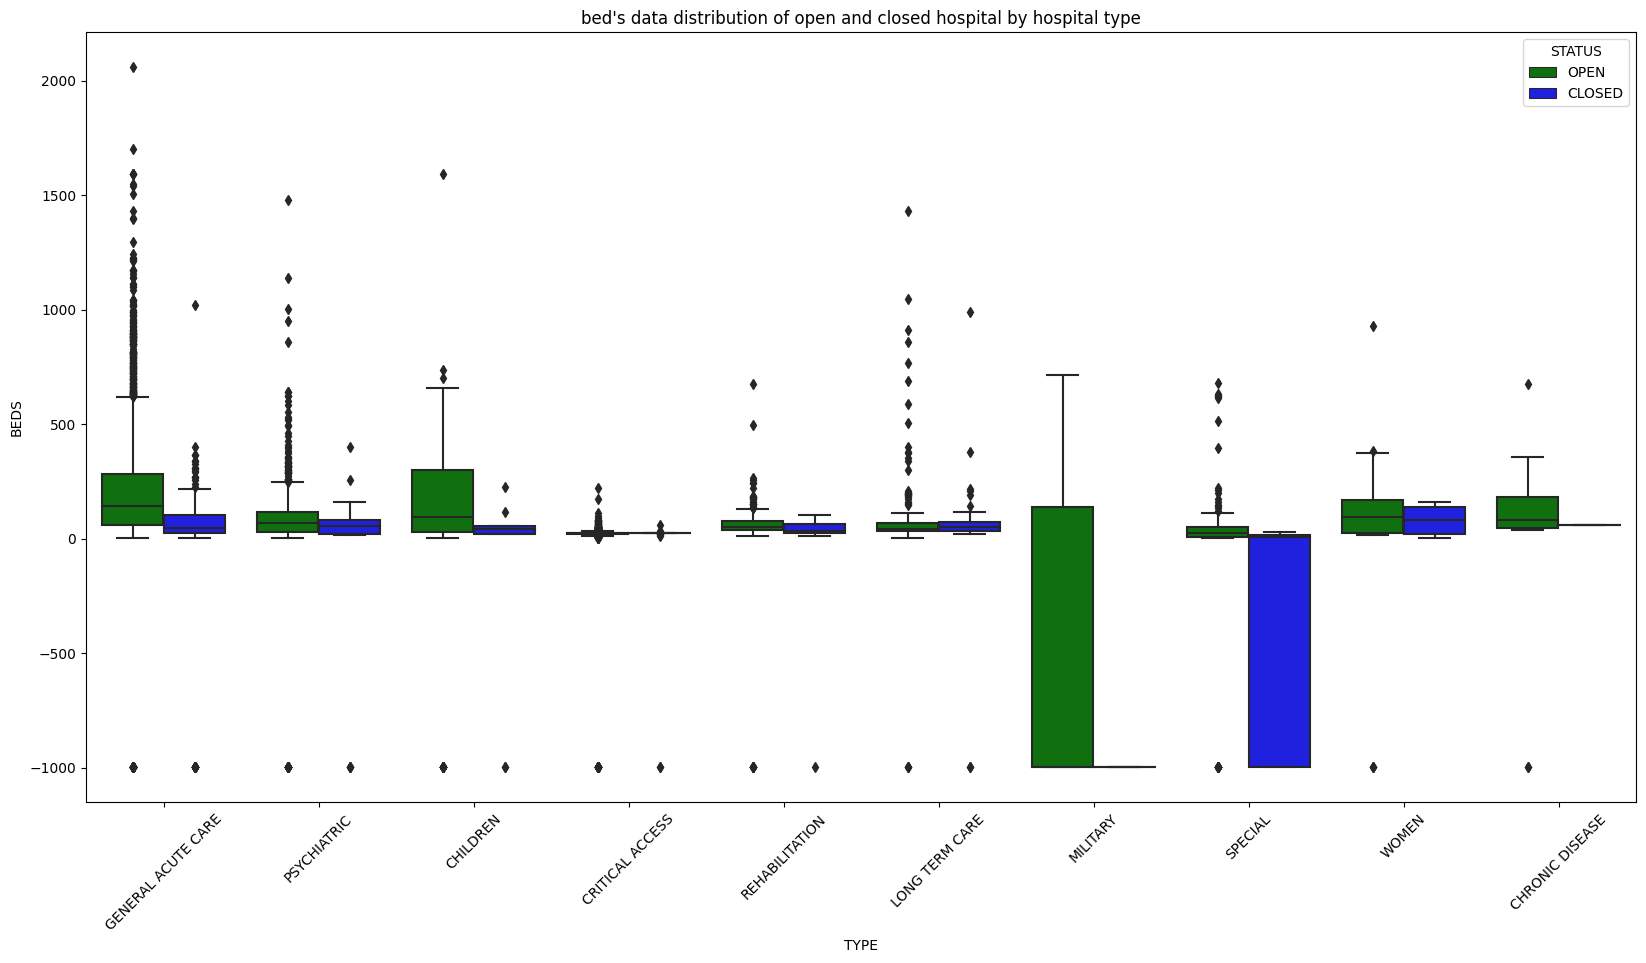

In [82]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='TYPE' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=45)
plt.title("bed's data distribution of open and closed hospital by hospital type")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each type</b></p> is that the data which correspond to <b>open hospital</b> and <b> closed hospital </b> are relatively distributed positively over trauma feature</p>
<p>-Secondly the distribution of bed's data in both hospital cases seems to be bretty or equaly distributed in some type cases like in :psychiatric ,log term care ,women compared to others</p>
<p>-Thirsty we have many outliers in the first 6 types compared to the rest which have relatively less outliers</p>

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by country")

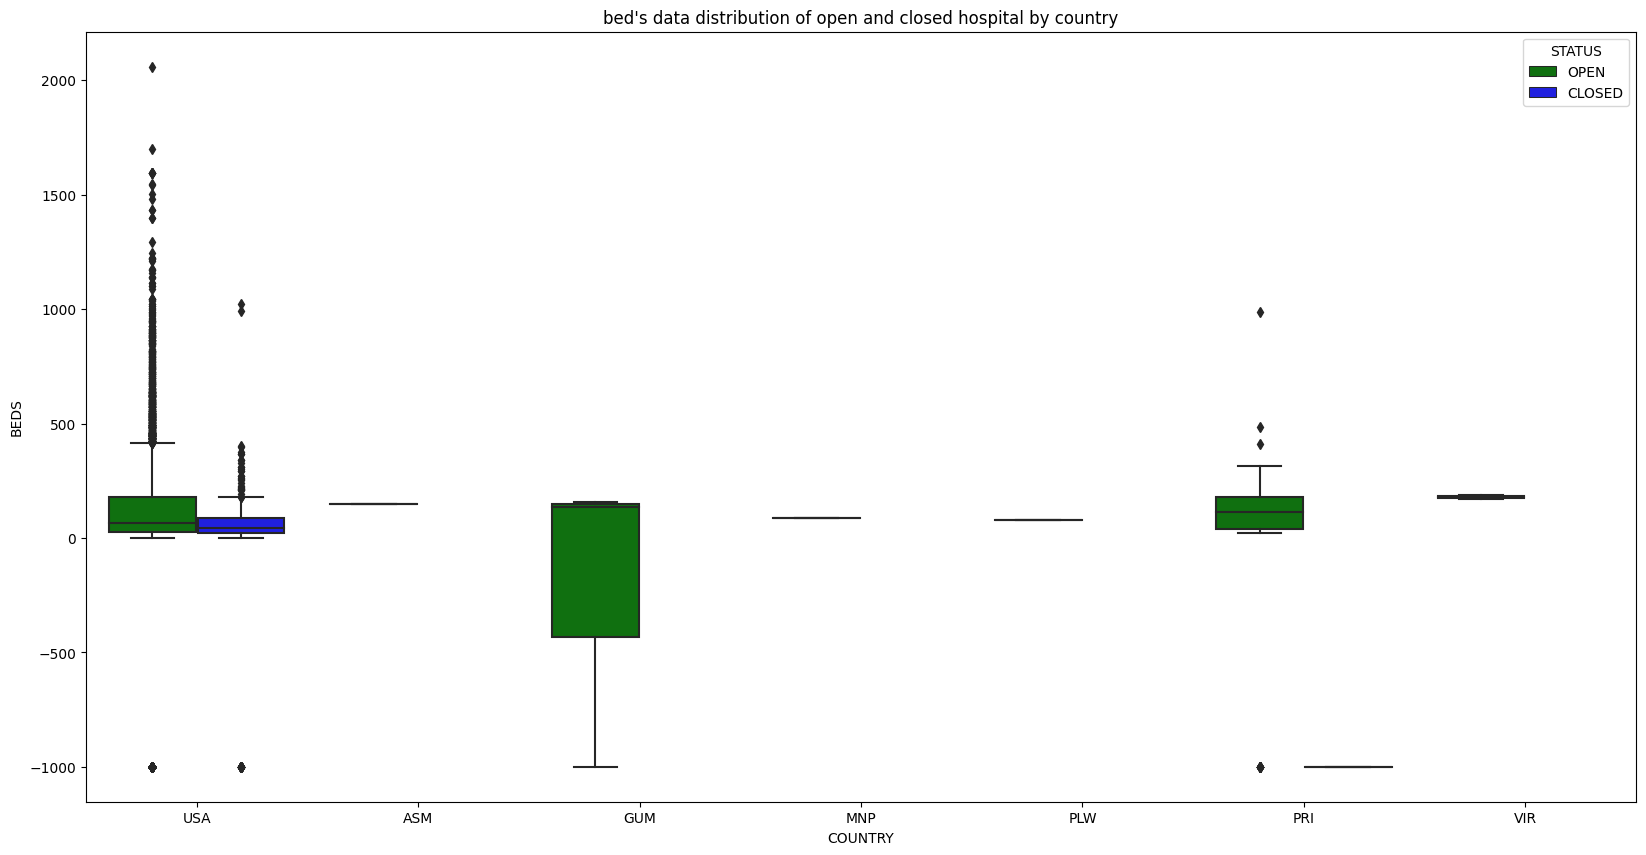

In [83]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='COUNTRY' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=0)
plt.title("bed's data distribution of open and closed hospital by country")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each country</b></p> is that the data which correspond to <b>open hospital</b> and <b> closed hospital </b> are relatively distributed positively over country feature apart the case of GUM county</p>
<p>-Secondly the distribution of bed's data in both hospital cases seems to be not equaly spreaded distributed apart the case of PRI country</p>
<p>-Thirsty we have many outliers in USA country compared to the rest which have relatively less outliers</p>
<p>-Fourthy some countries have not closed hospital which justify the absence of negative bed's distribution</p>

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by owner")

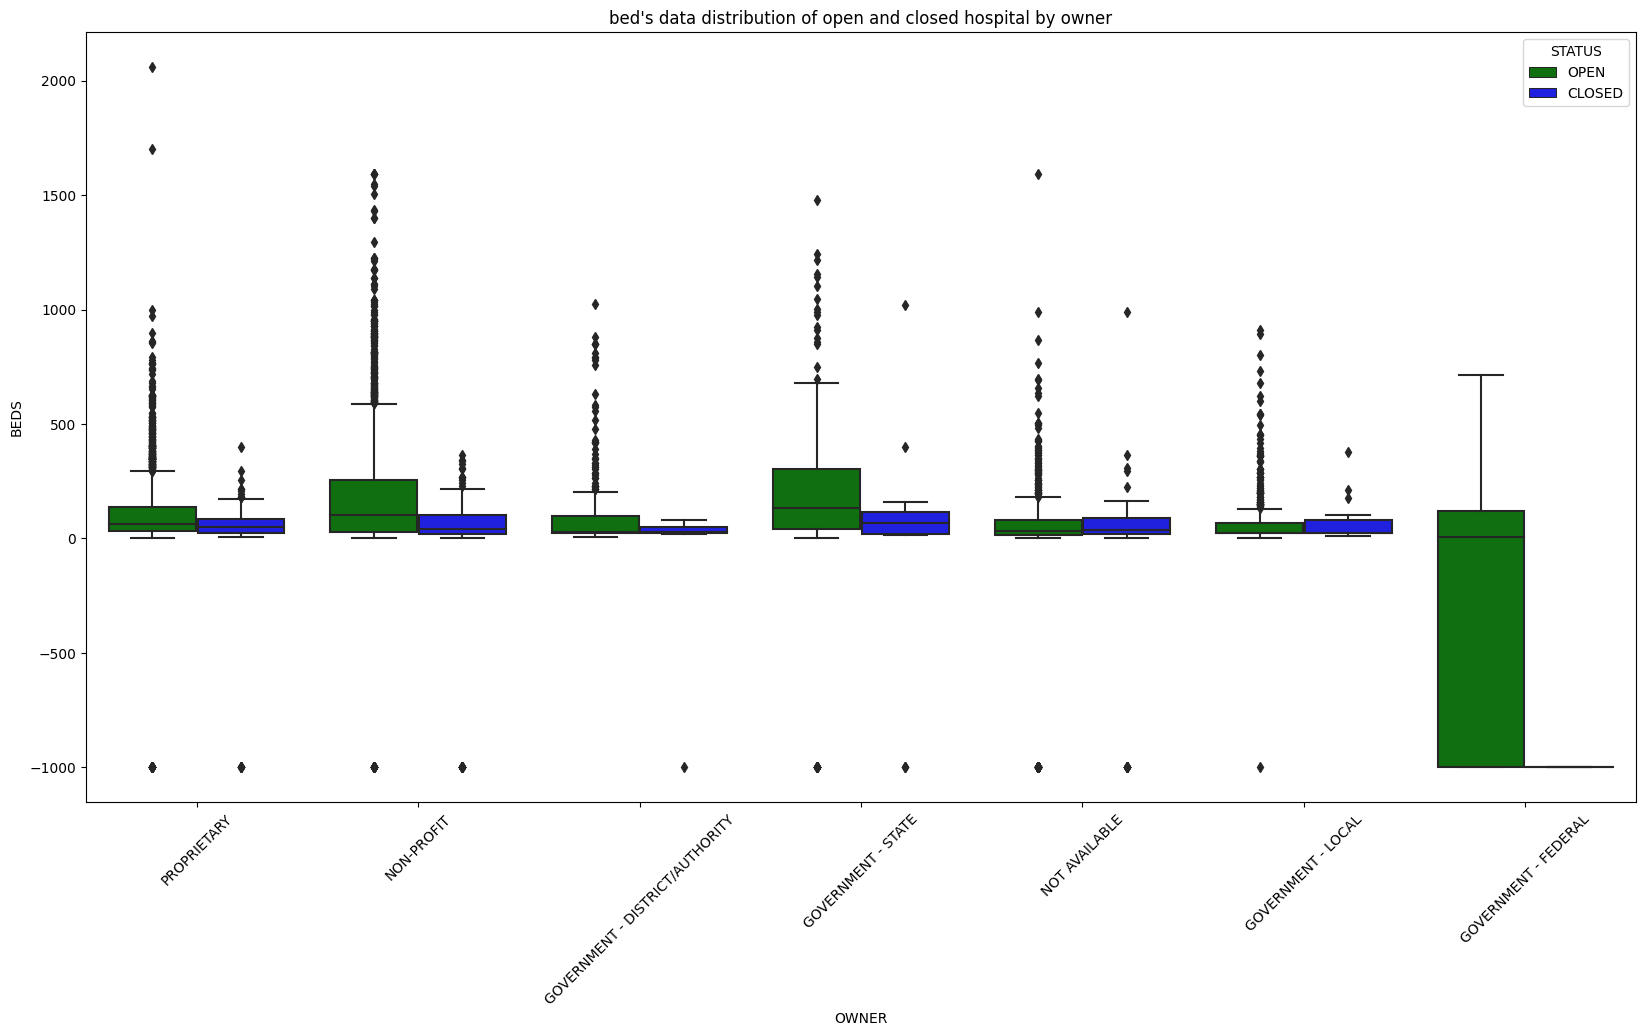

In [84]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='OWNER' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=45)
plt.title("bed's data distribution of open and closed hospital by owner")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each owner</b></p> is that the data which correspond to <b>open hospital</b> and <b> closed hospital </b> are relatively distributed positively over owner feature apart the case of government-federal county</p>
<p>-Secondly the distribution of bed's data in both hospital cases seems to be not equaly spreaded</p>
<p>-Thirsty we have many outliers in first 6 owner compared to the last one <b>government-federal</b></p>

Text(0.5, 1.0, "bed's data distribution of open and closed hospital by helipad")

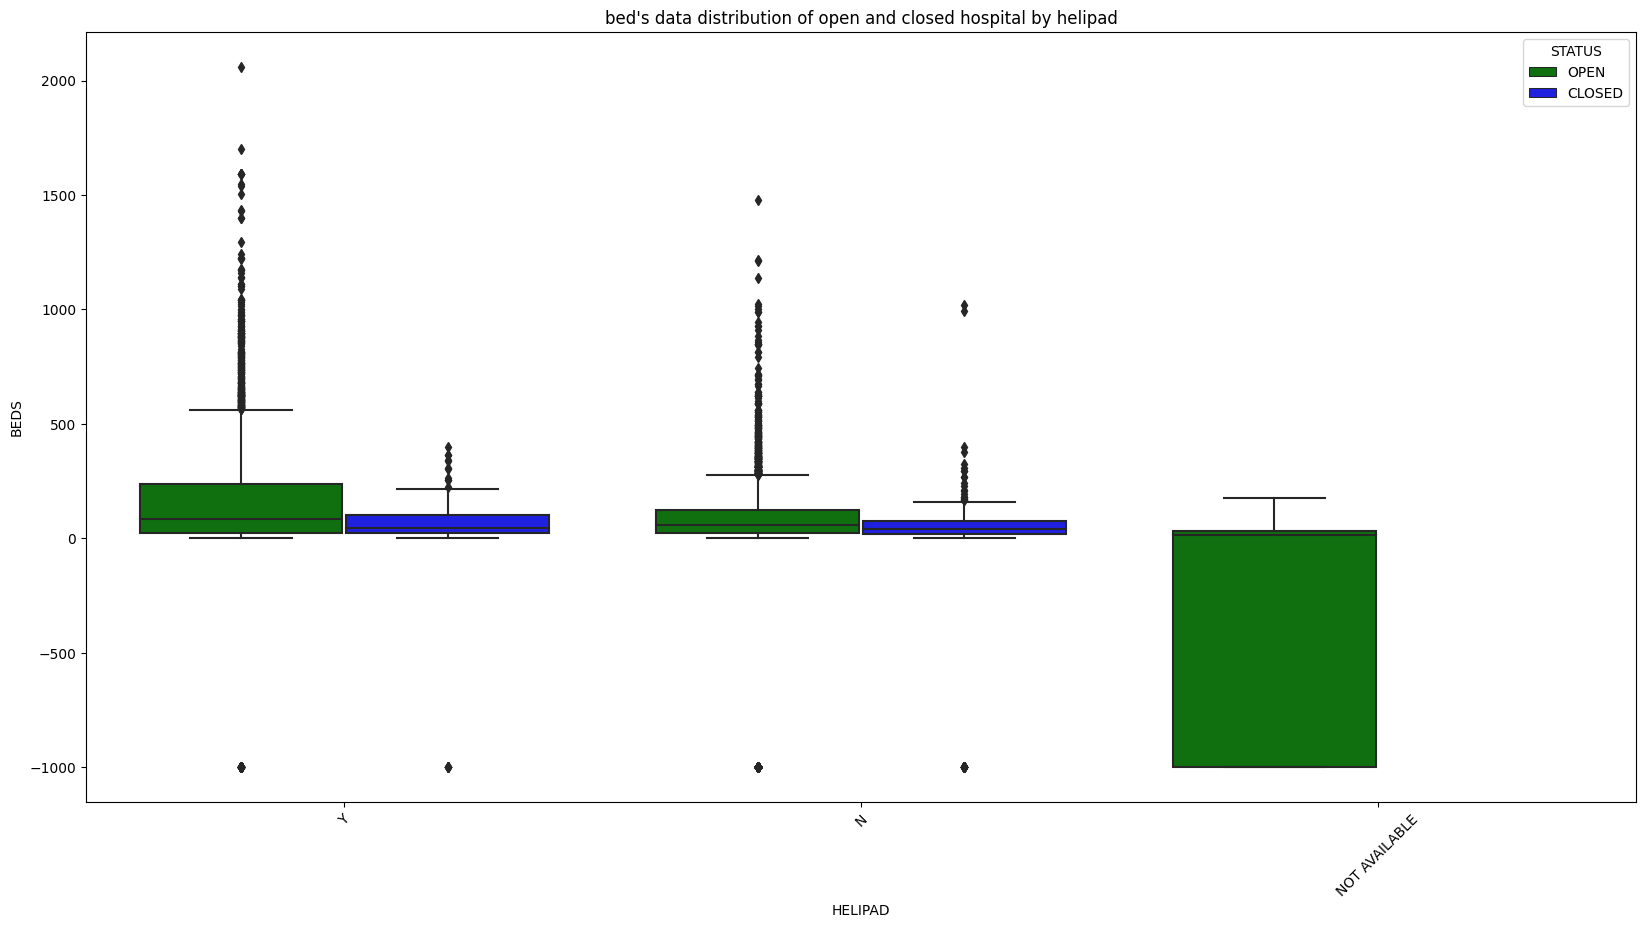

In [85]:
plt.figure(figsize=(20 ,10))
sns.boxplot(data=df ,x='HELIPAD' ,y='BEDS' ,hue='STATUS' ,palette={'OPEN':'green' ,'CLOSED':'blue'})
plt.xticks(rotation=45)
plt.title("bed's data distribution of open and closed hospital by helipad")

<p>-Firstly we could notice from the boxplot that present <b>bed's data distribution of open and closed hospital by each helipad feature</b></p> that the data correspond to <b>open hospital</b> and <b> closed hospital </b> are relatively distributed positively over helipad feature apart the case <b>not available</b></p>
<p>-Secondly the distribution of bed's data in both hospital cases seems to be not equaly spreaded distributed apart the case of PRI country</p>
<p>-Thirsty we have many outliers in Y and N helipad feature</p>
<p>-Fourthy <b>not available</b> have not closed hospital which justify the absence of negative bed's distribution</p>

In [86]:
bed_data = df['BEDS']

list = []
for i in bed_data:
    if i>=0:
        i = 'superior'
        list.append(i)
    else:
        i = 'inferior'
        list.append(i)

categorised_serie = pd.DataFrame(list)
data_sup_inf = categorised_serie.value_counts()
print(f"The number of beds that are superior or equal to zero :{data_sup_inf[0]}")
print(f"The number of beds that are inferior or equal to zero :{data_sup_inf[1]}")

The number of beds that are superior or equal to zero :7645
The number of beds that are inferior or equal to zero :368


In [87]:
owner_data = df['OWNER']

list_1 = []
for j in owner_data:
    if j == 'NOT AVAILABLE':
        list_1.append(j)

categorised_serie_1 = pd.DataFrame(list_1)
data_available = categorised_serie_1.value_counts()
print(f"The number of not available owner is :{data_available[0]}")

The number of not available owner is :675


In [88]:
helipad_data = df['HELIPAD']

list_2 = []
for k in helipad_data:
    if k == 'NOT AVAILABLE':
        list_2.append(k)

categorised_serie_2 = pd.DataFrame(list_2)
data_available = categorised_serie_2.value_counts()
print(f"The number of not available owner is :{data_available[0]}")

The number of not available owner is :37


In [89]:
LE = LabelEncoder()
df['ST_FIPS'] = LE.fit_transform(df['ST_FIPS'])
df['STATE'] = LE.fit_transform(df['STATE'])
df['TYPE'] = LE.fit_transform(df['TYPE'])
df['TRAUMA'] = LE.fit_transform(df['TRAUMA'])
df['COUNTRY'] = LE.fit_transform(df['COUNTRY'])
df['CITY'] = LE.fit_transform(df['CITY'])
df['COUNTY'] = LE.fit_transform(df['COUNTY'])
df['COUNTYFIPS'] = LE.fit_transform(df['COUNTYFIPS'])
df['OWNER'] = LE.fit_transform(df['OWNER'])
df['HELIPAD'] = LE.fit_transform(df['HELIPAD'])
df['STATUS'] = LE.fit_transform(df['STATUS'])

features = df[['X' ,'Y' ,'STATE' ,'TYPE' ,'TRAUMA' ,'COUNTRY' ,'CITY' ,'COUNTY' ,'OWNER' ,'HELIPAD']]
target = df['STATUS']

smote = SMOTE(random_state=42)
X_resampled ,y_resampled = smote.fit_resample(features ,target)                                      

the shape of X_resampled is :(15268, 10)
the shape of y_resampled is :(15268,)


Text(0.5, 1.0, 'The target pourcentage after processing and resampling')

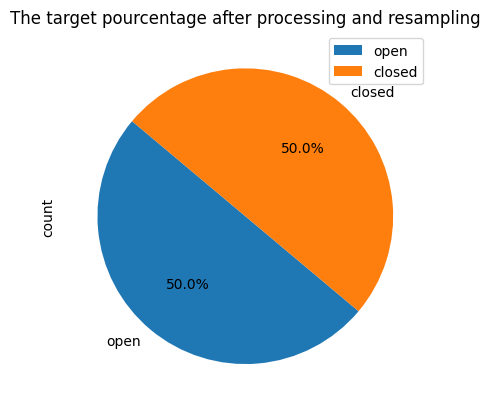

In [90]:
print(f"the shape of X_resampled is :{X_resampled.shape}")
print(f"the shape of y_resampled is :{y_resampled.shape}")
labels = ['open' ,'closed']
y_resampled.value_counts().plot(kind='pie' ,autopct='%1.1f%%', startangle=140, labels=labels, legend=True)
plt.title("The target pourcentage after processing and resampling")

Text(0.5, 1.0, 'Spatial destribution of open and closed hospital after resampling')

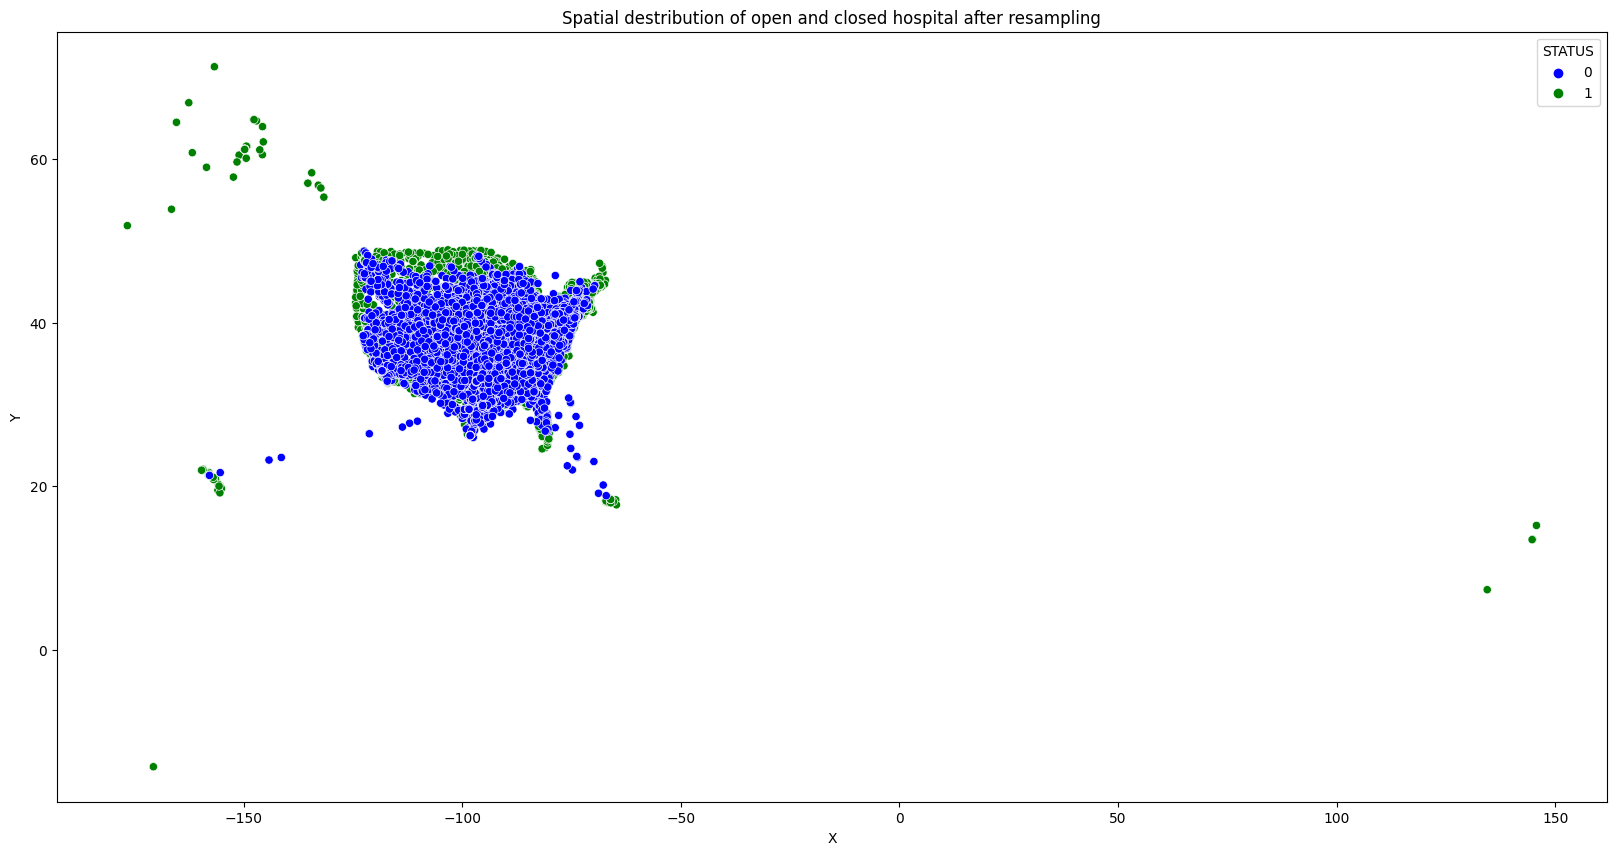

In [91]:
plt.figure(figsize=(20 ,10))
sns.scatterplot(data=X_resampled ,x=X_resampled['X'] ,y=X_resampled['Y'] ,hue=y_resampled ,palette={1:'green' ,0:'blue'})
plt.title('Spatial destribution of open and closed hospital after resampling')

the skewness coefficient before resampling is :-1.3500244131904606


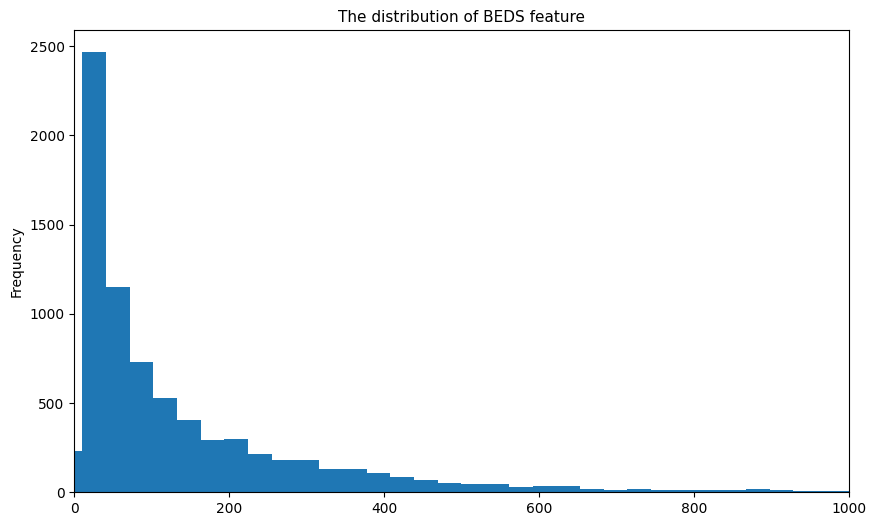

In [92]:
plt.figure(figsize=(10 ,6))
df['BEDS'].plot(kind='hist' ,bins=100)
plt.xlim(0 ,1000)
plt.title("The distribution of BEDS feature" ,fontsize=11)

skewness_before = df['BEDS'].skew()
print(f"the skewness coefficient before resampling is :{skewness_before}")

<p>We have a left-skewed ditribution of <b>BEDS</b> data which justify the negative value of skew coefficient</p>

<h2>Model training & testing</h2>

In [93]:
x_train ,x_test ,y_train ,y_test = train_test_split(X_resampled ,y_resampled ,test_size=0.2 ,random_state=42)
print(f"the x_train shape : {x_train.shape}")
print(f"the y_train shape : {y_train.shape}")
print(f"the x_test shape : {x_test.shape}")
print(f"the y_test shape : {y_test.shape}")

the x_train shape : (12214, 10)
the y_train shape : (12214,)
the x_test shape : (3054, 10)
the y_test shape : (3054,)


In [94]:
log_r = LogisticRegression(C=0.6)
log_r.fit(x_train ,y_train)

Rf = RandomForestClassifier(n_estimators=500)
Rf.fit(x_train ,y_train)

C:\Users\computer\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



RandomForestClassifier(n_estimators=500)

In [95]:
Random_forest_score = Rf.score(x_test ,y_test)
Logistic_regression_score = log_r.score(x_test ,y_test)
print(f"The final training score of Random logistic regression algorithm is : {Logistic_regression_score}")
print(f"The final training score of Random forest classifier algorithm is : {Random_forest_score}")
print(f"The best algorithm to be choised in our case is Random forest classifier algorithm")

The final training score of Random logistic regression algorithm is : 0.7151277013752456
The final training score of Random forest classifier algorithm is : 0.9548133595284872
The best algorithm to be choised in our case is Random forest classifier algorithm


<h2>Model evaluation</h2>

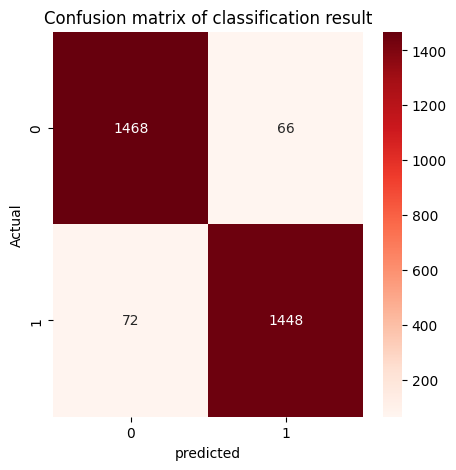

In [96]:
y_pred = Rf.predict(x_test)

confusion_matrix = confusion_matrix(y_test ,y_pred)
plt.figure(figsize=(5 ,5))
sns.heatmap(confusion_matrix ,annot=True ,fmt='d' ,cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of classification result')
plt.show()

In [97]:
Rf_precision_metric = precision_score(y_test ,y_pred)
Rf_accuracy_metric = accuracy_score(y_test ,y_pred)
Rf_f1score = f1_score(y_test ,y_pred)
print(f"The resulted accuracy metric of random forest algorithm {Rf_accuracy_metric}")
print(f"The resulted precision metric of random forest algorithm {Rf_precision_metric}")
print(f"The resulted f1 score metric of random forest algorithm {Rf_f1score}")

The resulted accuracy metric of random forest algorithm 0.9548133595284872
The resulted precision metric of random forest algorithm 0.9564068692206077
The resulted f1 score metric of random forest algorithm 0.954515491100857


<p>After evaluating the chosen algorithm, we noticed that the three metrics: <b>accuracy</b>, <b>precision</b>, and <b>f1-score</b> are relatively equal, with very good evaluation values, respectively 0.9528487229862476, 0.955026455026455, and 0.9525065963060685.</p>

<p>The equalization of metrics is attributed to the perfectly balanced dataset in the binary classification case.</p>